NAME : SRISHTI PATWAL ,
LINKEDIN URL : https://www.linkedin.com/in/shrishti-patwal-9a6bb3207

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
# Reading the dataset
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)

In [3]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
df.shape

(150, 4)

In [5]:
# Checking for null values
df[df.isnull().any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


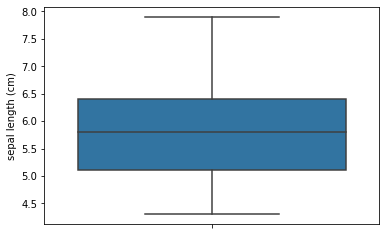

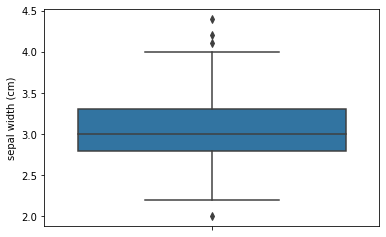

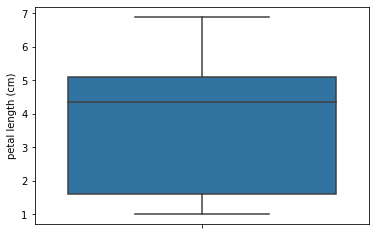

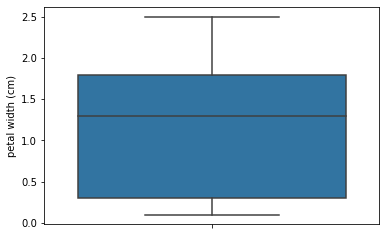

In [7]:
# Finding outliers
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [8]:
# Removing outliers from 'sepal width (cm)' column using IQR
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['sepal width (cm)'] >= Q1-1.5*IQR) & (df['sepal width (cm)'] <= Q3+1.5*IQR)]

In [9]:
# Finding out the number of rows and column after outlier treatment
df.shape 

(146, 4)

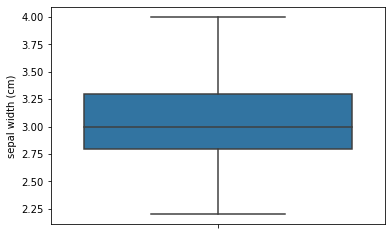

In [10]:
# Plotting the Bloxplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [11]:
# Standardizing to avoid bias
standardizer = StandardScaler()
df2= standardizer.fit_transform(df)

In [12]:
#To find the optimal no. of cluster
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df2)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.578228
4,5,88.947437
5,6,77.700192
6,7,67.976633
7,8,61.006327
8,9,52.230322
9,10,47.893179


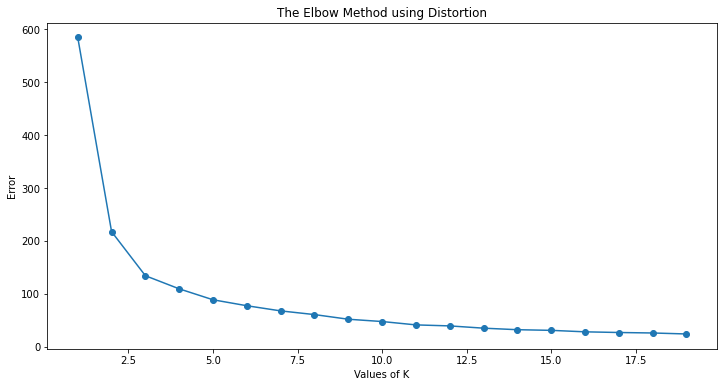

In [13]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [14]:
# Creating object of the model and fitting it
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [15]:
#analysis of cluster found
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))


In [16]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean',
               'petal width (cm)_mean']
df2.head()

,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,0,6.850000,3.073684,5.742105,2.071053
1,1,4.976596,3.376596,1.461702,0.246809
2,2,5.916393,2.760656,4.408197,1.440984


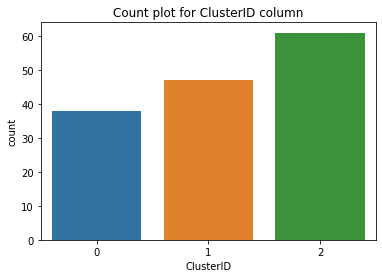

In [17]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()


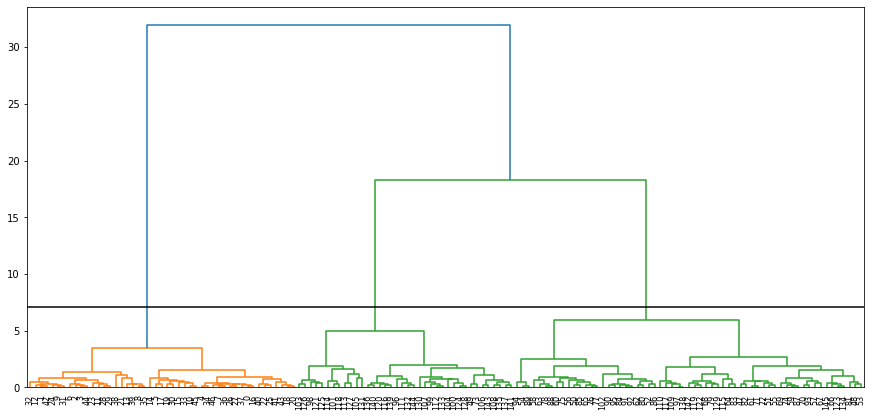

In [18]:
#heirarchical clustering with full dendrogram
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=150,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

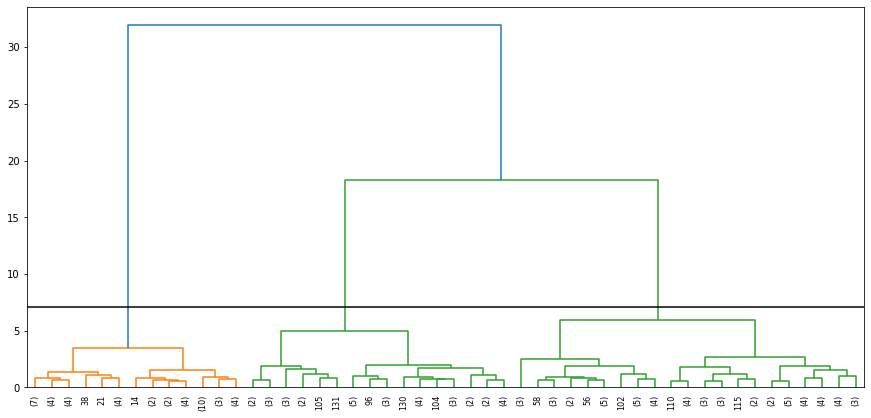

In [19]:
#heirarchical clustering with full dendrogram for 50
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=50,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

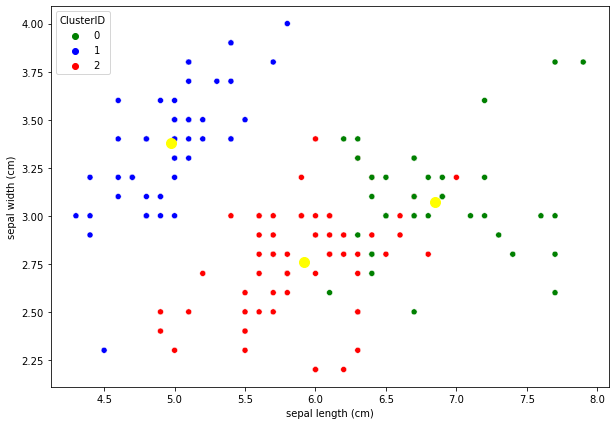

In [20]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

In [21]:
# So we have formed 3 clusters for the Iris dataset.

In [22]:
# THANK YOU